In [1]:
# !wget https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/refs/heads/master/cohorts/2025/04-evaluation/homework.md

--2025-10-20 08:37:22--  https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/refs/heads/master/cohorts/2025/04-evaluation/homework.md
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4041 (3.9K) [text/plain]
Saving to: ‘homework.md’

homework.md         100%[===================>]   3.95K  --.-KB/s    in 0s      

2025-10-20 08:37:23 (46.1 MB/s) - ‘homework.md’ saved [4041/4041]



## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here] ✔️ (https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-20 20:10:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78.98K  --.-KB/s    in 0.002s  

2025-10-20 20:10:57 (40.7 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features. ✔️
* If there are missing values:
    * For caterogiral features, replace them with 'NA' ✔️
    * For numerical features, replace with with 0.0 ✔️

In [1]:
import pandas as pd, numpy as np
def getInitDF(src):
    '''
    Input: src ('the source from where the data is read into a dataframe')
    Output: (df, num_columns, cat_columns)
    Description:
        This function is for returning a tuple containing a dataframe from 'src' parameter, list of numerical columns 
        and list of categorical columns from that dataframe
    '''
    df=pd.read_csv(src)
    print(df.isnull().sum())
    display(df.dtypes)
    num_columns = df.select_dtypes(exclude=['object']).columns.tolist()
    num_columns.remove('converted')
    cat_columns = df.select_dtypes(include=['object']).columns.tolist()
    df[cat_columns] = df[cat_columns].fillna('NA')
    df[num_columns] = df[num_columns].fillna(0)
    print(df.isnull().sum())
    return (df, num_columns, cat_columns)
    
(df, num_columns, cat_columns) = getInitDF('course_lead_scoring.csv')
(num_columns, cat_columns)

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64


(['number_of_courses_viewed',
  'annual_income',
  'interaction_count',
  'lead_score'],
 ['lead_source', 'industry', 'employment_status', 'location'])

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1` ✔️

In [2]:
from sklearn.model_selection import train_test_split
df_original = df.copy()
def splitDataset(df):
    df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    return (df_full_train, df_train, df_val, df_test)

(df_full_train, df_train, df_val, df_test) = splitDataset(df)
(len(df), len(df_full_train), len(df_train)+len(df_val), len(df_full_train)+len(df_test))

(1462, 1169, 1169, 1462)

In [3]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

'''
del df_train['converted']
del df_val['converted']
del df_test['converted']
'''

"\ndel df_train['converted']\ndel df_val['converted']\ndel df_test['converted']\n"

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that





In [5]:
from sklearn.metrics import auc, roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
# roc_auc_score(y_val, y_pred)
# y_train, y_val, y_test = [],[],[]
# print(roc_auc_score(y_train, df_train[num_columns[:1]].values))

for target in num_columns:
    print(f'for "{target}", we have {roc_auc_score(y_train, df_train[target].values)}')
    '''
    new_num_columns = num_columns
    new_num_columns.remove(target)
    df = df_original.copy()
    (df_full_train, df_train, df_val, df_test) = splitDataset(df)
    
    y_train = df_train[target].values
    y_val = df_val[target].values
    y_test = df_test[target].values

    del df_train[target]
    del df_val[target]
    del df_test[target]

    dv = DictVectorizer(sparse=False)
    
    train_dict = df_train[cat_columns + new_num_columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    val_dict = df_val[cat_columns + new_num_columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]
    target_decision = (y_pred >= 0.5)
    print((y_val == target_decision).mean())
    #print(roc_auc_score(y_val, y_pred))
'''

for "number_of_courses_viewed", we have 0.7635680590007088
for "annual_income", we have 0.5519578313253012
for "interaction_count", we have 0.738270176293409
for "lead_score", we have 0.6144993577250176


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count` <---
- `annual_income`

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000) ✔️
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72 <--- (for now)
- 0.92

In [6]:
dv = DictVectorizer(sparse=False)
del df_train['converted']
del df_val['converted']
del df_test['converted']

train_dict = df_train[cat_columns + num_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[cat_columns + num_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
target_decision = (y_pred >= 0.5)
(y_val == target_decision).mean()

np.float64(0.6996587030716723)

In [7]:
round(roc_auc_score(y_val, y_pred),3)

0.817

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01 ✔️
* For each threshold, compute precision and recall ✔️
* Plot them ✔️

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745 <--- (for now)

/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/tmp/ipykernel_6629

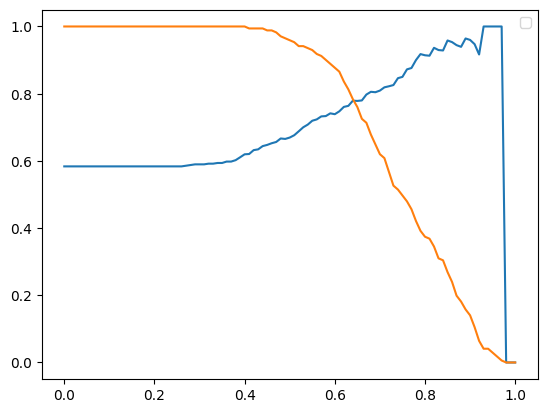

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

thresholds=np.linspace(0,1,num=101)

'''
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[cat_columns + num_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
'''
precisions=[]
recalls=[]
for t in thresholds:
    loop_target_decision = (y_pred >= t)

    precisions.append(precision_score(y_val, loop_target_decision, average='binary'))
    recalls.append(recall_score(y_val, loop_target_decision, average='binary'))

plt.plot(thresholds,precisions)
plt.plot(thresholds, recalls)
plt.legend()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54 <--- (for now)
- 0.74

[[0.57       0.8125    ]
 [0.55       0.81122449]
 [0.56       0.80927835]
 [0.59       0.80851064]
 [0.58       0.80839895]
 [0.54       0.80604534]
 [0.53       0.80299252]
 [0.61       0.80216802]
 [0.6        0.80213904]
 [0.62       0.79665738]
 [0.52       0.79506173]
 [0.51       0.79126214]
 [0.48       0.79047619]
 [0.5        0.78846154]
 [0.49       0.7875895 ]
 [0.63       0.78753541]
 [0.47       0.78688525]
 [0.46       0.78604651]
 [0.45       0.78240741]
 [0.44       0.7816092 ]
 [0.64       0.78134111]
 [0.43       0.77448747]
 [0.42       0.77272727]
 [0.65       0.76923077]
 [0.4        0.76510067]
 [0.41       0.76404494]
 [0.39       0.75831486]
 [0.67       0.75308642]
 [0.38       0.75164835]
 [0.66       0.75151515]
 [0.37       0.74835886]
 [0.36       0.74835886]
 [0.35       0.74509804]
 [0.34       0.74509804]
 [0.33       0.74347826]
 [0.32       0.74347826]
 [0.31       0.74186551]
 [0.29       0.74186551]
 [0.3        0.74186551]
 [0.28       0.74025974]


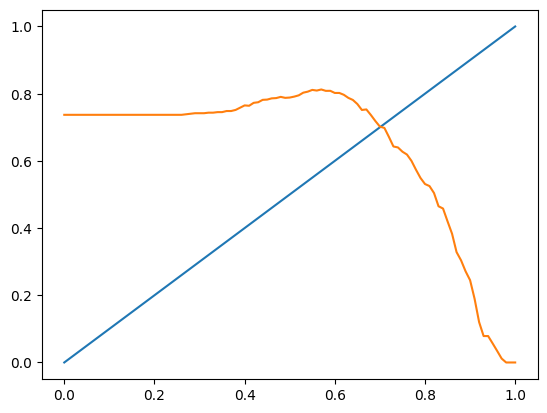

In [9]:
f1 = []
for t in thresholds:
    loop_target_decision = (y_pred >= t)

    f1.append([t,f1_score(y_val, loop_target_decision, average='binary')])

f1_matrix = np.array(f1)
# Get the indices that would sort the second column (f1_score) in ascending order
sort_indices = np.argsort(f1_matrix[:, 1])

# Reverse the indices to get descending order (highest F1 score first)
descending_sort_indices = sort_indices[::-1]

# Apply the sorted indices to the whole matrix
sorted_f1_matrix = f1_matrix[descending_sort_indices]
print(sorted_f1_matrix)

plt.plot(thresholds,f1)


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train` ✔️
* Split the data into train and validation ✔️
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)` ✔️
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06 <--- (for now)
- 0.36

In [59]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores=[]
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train, C=1)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.9f +- %.9f' % (np.mean(scores), np.std(scores)))

0.822108915 +- 0.035807119


In [57]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

def train(df_train, y_train, C=1.0):
    dicts = df_train[cat_columns + num_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[cat_columns + num_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]` ✔️
* Initialize `KFold` with the same parameters as previously ✔️
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)` ✔️
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits) ✔️

Which `C` leads to the best mean score?

- 0.000001
- 0.001 <---
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [61]:
for C in tqdm([0.000001, 0.001, 1]):
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036
